In [2]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hr = pd.read_csv("data/hr_data.csv")

In [3]:
categorical_list= ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction',\
                 'Gender', 'JobInvolvement', 'JobLevel','JobRole', 'JobSatisfaction','MaritalStatus','PerformanceRating',\
                    'StockOptionLevel','RelationshipSatisfaction', 'OverTime', 'WorkLifeBalance']

In [4]:
for col in categorical_list:
    hr[col] = hr[col].astype('category')

In [5]:
# del EmplyeeCount, StandardHours
hr = hr.drop(['EmployeeCount', 'StandardHours', 'Over18'],1)
hr.shape

(1470, 32)

In [6]:
hr.dtypes

Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                   category
EducationField              category
EmployeeNumber                 int64
EnvironmentSatisfaction     category
Gender                      category
HourlyRate                     int64
JobInvolvement              category
JobLevel                    category
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating           category
RelationshipSatisfaction    category
StockOptionLevel            category
TotalWorkingYears              int64
TrainingTimesLastYear          int64
W

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [7]:
attr_sum = hr.groupby("Attrition").sum()
attr_sum

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,
No,46313,1001818,10993,1267100,81319,8424768,17589706,3262,18780,14627,3493,9086,5529,2755,5385
Yes,7965,177836,2520,239452,15541,1134541,3450556,697,3578,1954,622,1216,688,461,676


In [8]:
no_count = hr.groupby("Attrition").count().iloc[0,0]
yes_count = hr.groupby("Attrition").count().iloc[1,0]

attr_perc = pd.DataFrame([attr_sum.iloc[0,:]/no_count, attr_sum.iloc[1,:]/yes_count])
attr_perc/attr_perc.sum(0)

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
No,0.527776,0.519881,0.456077,0.504247,0.501438,0.588024,0.494908,0.473566,0.502211,0.589971,0.519098,0.58953,0.607026,0.534602,0.604926
Yes,0.472224,0.480119,0.543923,0.495753,0.498562,0.411976,0.505092,0.526434,0.497789,0.410029,0.480902,0.41047,0.392974,0.465398,0.395074


In [9]:
print(no_count/(no_count+yes_count))
print(yes_count)

0.8387755102040816
237


In [10]:
(attr_perc/attr_perc.sum(0)).diff()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yes,-0.055553,-0.039761,0.087846,-0.008494,-0.002876,-0.176048,0.010183,0.052868,-0.004422,-0.179942,-0.038197,-0.17906,-0.214052,-0.069204,-0.209853



* StockOptionLevel 23%
* YearsInCurrentRole 21%
* YearsWithCurrManager 20%
* TotalWorkingYears 18%
* YearsAtCompany 17.9%
* MonthlyIncome 17.6%

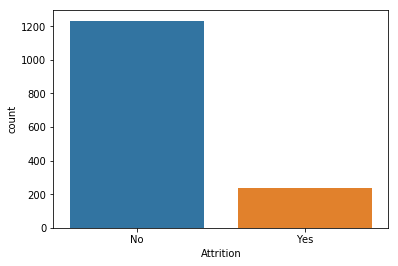

In [11]:
sns.countplot(x="Attrition", data=hr)

In [12]:
processed_data = hr.drop(categorical_list,1)
column_names = processed_data.columns
print(*column_names)

Age DailyRate DistanceFromHome EmployeeNumber HourlyRate MonthlyIncome MonthlyRate NumCompaniesWorked PercentSalaryHike TotalWorkingYears TrainingTimesLastYear YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager


## Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(processed_data))
normalized_data = pd.DataFrame(scaler.transform(processed_data))
normalized_data.columns= [*column_names]
normalized_data.head()

MinMaxScaler(copy=True, feature_range=(0, 1))


,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.715820,0.000000,0.000000,0.914286,0.262454,0.698053,0.888889,0.000000,0.200,0.0,0.15,0.222222,0.000000,0.294118
1,0.738095,0.126700,0.250000,0.000484,0.442857,0.217009,0.916001,0.111111,0.857143,0.250,0.5,0.25,0.388889,0.066667,0.411765
2,0.452381,0.909807,0.035714,0.001451,0.885714,0.056925,0.012126,0.666667,0.285714,0.175,0.5,0.00,0.000000,0.000000,0.000000
3,0.357143,0.923407,0.071429,0.001935,0.371429,0.100053,0.845814,0.111111,0.000000,0.200,0.5,0.20,0.388889,0.200000,0.000000
4,0.214286,0.350036,0.035714,0.002903,0.142857,0.129489,0.583738,1.000000,0.071429,0.150,0.5,0.05,0.111111,0.133333,0.117647


In [14]:
encoded_data = pd.get_dummies(hr.loc[:,categorical_list])

In [15]:
normalized_data = pd.concat([normalized_data, encoded_data],1)

In [16]:
normalized_data.columns
normalized_data.columns.get_loc("Attrition_Yes")

16

# Modeling
* Logistic Regression(Done)
* Random Forest(variable importance) - YH
* Gradient Boosting - YJ
* XGboost - MH

## Logistic Regression

In [17]:
# use Attrition_Yes as target
normalized_data = normalized_data.drop("Attrition_No",1)

In [18]:
normalized_labels = normalized_data['Attrition_Yes']

temp_data = normalized_data.drop(['Attrition_Yes'], axis=1)

In [19]:
temp_data.shape, normalized_labels.shape

((1470, 79), (1470,))

In [31]:
# split train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(temp_data, normalized_labels, test_size=0.3, random_state=12)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 79)
(441, 79)
(1029,)
(441,)


In [1]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

NameError: name 'X_train' is not defined

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[365  15]
 [ 33  28]]


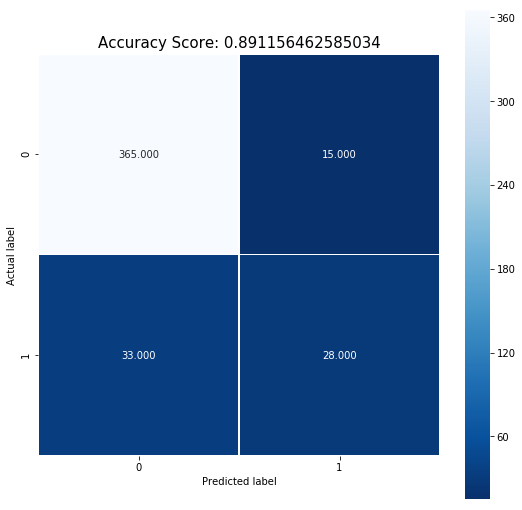

In [34]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

normalized_data.to_csv( "data/processed_data.csv")

## Imbalanced Data
* weighting: punishing the errors on the minority class
* upsampling: randomly replicating instances in the minority class
* downsampling: randomly removing instances in the majority class
* SMOTE: synthetic minority oversampling technique(minority class instance)